#Predicting Operational Efficiency of Manufacturing Teams

This dataset contains daily operational statistics for several production teams working in a garment manufacturing unit. Each record corresponds to one team on one specific day and captures metrics such as work time, idle time, team size, production targets, and achieved productivity.

- The goal is to predict team efficiency (or productivity ratio) using production-related and workforce-related features.

#Problem Statement (Student Version)

- Predicting Team Efficiency in a Manufacturing Plant
- You are working as a data analyst for a manufacturing company.
- The management wants to understand the factors that influence the daily operational efficiency of production teams.

##Your task is to:
- Preprocess
- Perform exploratory data analysis (EDA) to identify key productivity drivers.
- Feature Engg
- Evaluate the Model
- Explain your findings and model interpretability insights

## EDA (Exploratory Data Analysis)

In [ ]:
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/manufacturing_data.csv')
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [ ]:
df.columns

Index(['recordDate', 'fiscalQuarter', 'productionDept', 'dayOfWeek', 'team',
       'plannedEfficiency', 'standardMinuteValue', 'workInProgress',
       'overtimeMinutes', 'performanceBonus', 'idleMinutes', 'idleWorkers',
       'styleChangeCount', 'workerCount', 'efficiencyScore'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
recordDate,0
fiscalQuarter,0
productionDept,0
dayOfWeek,0
team,0
plannedEfficiency,0
standardMinuteValue,0
workInProgress,506
overtimeMinutes,0
performanceBonus,0


In [ ]:
fig = px.scatter(
    df,
    x='workerCount',
    y='efficiencyScore',
    title='Efficiency Score vs Worker Count',
    color='productionDept'

)

fig.show()

In [ ]:
df['productionDept'].value_counts()

,count
productionDept,
Stitching Unit,691
Finishing & Quality,257
Finishing & Quality,249


- From the graph, it is evident that the missing values occur only in Finishing & Quality.

- Also, Finishing & Quality appears twice due to the presence of extra whitespace at the end of some Finishing & Quality column.

In [ ]:
df['productionDept'].unique()

array(['Stitching Unit', ' Finishing & Quality ', 'Finishing & Quality'],
      dtype=object)

In [ ]:
df['productionDept'] = df['productionDept'].str.strip() # Strip whitespace

In [ ]:
print(df['productionDept'].unique())

['Stitching Unit' 'Finishing & Quality']


In [ ]:
num_cols_stitch = df.select_dtypes(include='number').columns

corr_stitch = df[num_cols_stitch].corr()    # correlation matrices

fig = px.imshow(
    corr_stitch,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix'
)
fig.show()

- The heatmap shows there is no strong correlation between the target column and the dependent varriables
- This might be because both the departments (Finishing & Quality, Stitching Unit) have diffrent patterns

In [ ]:
hover_cols = [
    'recordDate',
    'fiscalQuarter',
    'productionDept',
    'team',
    'performanceBonus',
    'styleChangeCount',
    'idleWorkers',
    'workInProgress'
]                       #things to show when hovered

In [ ]:
px.scatter(
    df,
    x='workerCount',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Worker Count vs Efficiency'
).show()

In [ ]:
px.scatter(
    df,
    x='plannedEfficiency',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Planned Efficiency vs Actual Efficiency'
).show()

In [ ]:
px.scatter(
    df,
    x='overtimeMinutes',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Overtime vs Efficiency'
).show()

In [ ]:
px.scatter(
    df,
    x='idleMinutes',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Idle Minutes vs Efficiency'
).show()

- From the graphs its evident that both the departments have entierly diffrent patterns all accross the varriables.
- This can be primarly because of a fact that Stitching Unit is a Production department and Finishing & Quality is a post production department.
- Hence both has diffrent values/patterns all accross the varriables.

In [ ]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


- From the above table its evident that the data has outliers.
- These could be extreme scenarios such as a malfunction during production causing garments to get stuck or overstocked in certain teams, or manual errors while logging values.
- Either case we have to mitigate this else regression model will be biased.

## Preprocessing

In [ ]:
stitching_df = df[df['productionDept'] == 'Stitching Unit']
finishing_df = df[df['productionDept'] == 'Finishing & Quality']        #split the dataset

In [ ]:
stitching_df.to_csv('/content/stitching_unit.csv', index=False)
finishing_df.to_csv('/content/finishing_quality.csv', index=False)     #save the splited dataset

In [ ]:
px.scatter(
    stitching_df,
    x='workerCount',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Worker Count vs Efficiency'
).show()

In [ ]:
px.scatter(
    stitching_df,
    x='plannedEfficiency',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Planned Efficiency vs Actual Efficiency'
).show()

In [ ]:
px.scatter(
    stitching_df,
    x='overtimeMinutes',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Overtime vs Efficiency'
).show()

In [ ]:
px.scatter(
    stitching_df,
    x='idleMinutes',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Idle Minutes vs Efficiency'
).show()

In [ ]:
px.scatter(
    stitching_df,
    x='standardMinuteValue',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Standard Minute Value vs Efficiency'
).show()

In [ ]:
px.scatter(
    stitching_df,
    x='workInProgress',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Work In Progress vs Efficiency'
).show()

In [ ]:
px.scatter(
    stitching_df,
    x='performanceBonus',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Performance Bonus vs Efficiency'
).show()

In [ ]:
px.scatter(
    stitching_df,
    x='idleWorkers',
    y='efficiencyScore',
    color='team',
    hover_data=hover_cols,
    title='Idle Workers vs Efficiency'
).show()

- To mitigate the Outliers we can define a range by looking at the graphs

| Feature              | Minimum | Maximum |
|-----------------------|----------|----------|
| Planned Efficiency    | 3.5      | 0.8      |
| Idle Minutes          | 0        | 8        |
| Overtime Minutes      | 0        | 10620    |
| Worker Count          | 26       | 60       |
| Standard Minute Value | 10       | 32       |
| Work In Progress      | 0        | 1871     |
| Performance Bonus     | 0        | 100      |


In [ ]:
stitching_df = pd.read_csv('/content/stitching_unit.csv')
num_cols_stitch = stitching_df.select_dtypes(include='number').columns
corr_stitch = stitching_df[num_cols_stitch].corr()

fig1 = px.imshow(
    corr_stitch,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix — Stitching Unit'
)
fig1.show()          #new correlation heatmap


In [ ]:
finishing_df = pd.read_csv('/content/finishing_quality.csv')
num_cols_finish = finishing_df.select_dtypes(include='number').columns
corr_finish = finishing_df[num_cols_finish].corr()

fig2 = px.imshow(
    corr_finish,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix — Finishing & Quality'
)
fig2.show()

- From the heatmap its evident that both departments have diffrent patterns.
- Technically Finishing & Quality has less features and there are no usefull pattern/relation with the target column.

In [ ]:
fig = px.violin(
    stitching_df,
    x='team',
    y='efficiencyScore',
    color='team',
    box=True,
    points='all',
    title='Team-wise Efficiency Score Density (stitching Unit)'
)
fig.show()  # Violin Plot team wise eff score

summary_fq = stitching_df.groupby('team')['efficiencyScore'].describe().reset_index()
print("Team-wise Efficiency Score Statistics (Stitching Unit):\n")
print(summary_fq.to_string(index=False))

Team-wise Efficiency Score Statistics (Stitching Unit):

   team  count     mean      std      min      25%      50%      75%      max
Line-C1   55.0 0.654707 0.172210 0.285333 0.529261 0.700542 0.800127 0.900145
Line-C2   56.0 0.656631 0.179689 0.251399 0.541641 0.700512 0.800137 0.940725
Line-F1   59.0 0.730577 0.135896 0.350633 0.675132 0.790003 0.800895 0.900800
Line-F2   58.0 0.641486 0.132351 0.233705 0.571358 0.700080 0.718788 0.800980
Line-F3   59.0 0.719471 0.118746 0.263694 0.700132 0.750651 0.800247 0.879714
Line-P1   59.0 0.676165 0.128696 0.349951 0.600523 0.700509 0.775341 0.821113
Line-P2   59.0 0.770054 0.081218 0.350218 0.800054 0.800355 0.800402 0.850521
Line-Q1   58.0 0.742341 0.125830 0.283054 0.700443 0.750494 0.800137 0.970817
Line-Q2   57.0 0.716959 0.180987 0.249417 0.699984 0.750057 0.800630 0.999995
Line-S1   56.0 0.815150 0.156910 0.268214 0.800094 0.850058 0.900136 1.100484
Line-S2   57.0 0.762394 0.188403 0.302770 0.700070 0.800000 0.900158 1.050281
Line-S3

- From the Violin plot its evident that there are teams which perform consistently.
- Also there are poor performers and teams which actually are efficient.

In [ ]:
fig1 = px.violin(
    stitching_df,
    x='styleChangeCount',
    y='efficiencyScore',
    color='styleChangeCount',
    box=True,
    points='all',
    title='Stitching Unit: Efficiency Score by Style Change'
)
fig1.show()

In [ ]:
fig2 = px.violin(
    finishing_df,
    x='styleChangeCount',
    y='efficiencyScore',
    color='styleChangeCount',
    box=True,
    points='all',
    title='Finishing & Quality: Efficiency Score by Style Change Count'
)
fig2.show()

- This makes the intution right as Finishing & Quality is a post production department it has No Style Change.
- Cause only while production you get Style Change for garments.
- Hence in the Finishing & Quality column styleChangeCount has just 1 value which means the varriable is providing no information

## Feature Engineering

In [ ]:
stitching_df = pd.read_csv('/content/stitching_unit.csv')

In [ ]:
stitching_df_filtered = stitching_df[
    (stitching_df['plannedEfficiency'] >= 0.35) & (stitching_df['plannedEfficiency'] <= 0.8) &
    (stitching_df['idleMinutes'] >= 0) & (stitching_df['idleMinutes'] <= 8) &
    (stitching_df['overtimeMinutes'] >= 0) & (stitching_df['overtimeMinutes'] <= 10620) &
    (stitching_df['workerCount'] >= 26) & (stitching_df['workerCount'] <= 60) &
    (stitching_df['standardMinuteValue'] >= 10) & (stitching_df['standardMinuteValue'] <= 32) &
    (stitching_df['workInProgress'] >= 0) & (stitching_df['workInProgress'] <= 1871) &
    (stitching_df['performanceBonus'] >= 0) & (stitching_df['performanceBonus'] <= 100)
]

Removing outliers as per the range we got erlier

In [ ]:
df['plannedEfficiency'].sample(10)

,plannedEfficiency
32,0.80
265,0.80
48,0.50
230,0.80
408,0.80
509,0.80
427,0.80
456,0.80
426,0.80
380,0.35


In [ ]:
stitching_df_clean = stitching_df_filtered.drop(columns=['recordDate', 'dayOfWeek', 'productionDept', 'idleWorkers']) #drop

In [ ]:
cols_with_optional = stitching_df_clean.copy()

In [ ]:
variant1 = pd.get_dummies(cols_with_optional, columns=['team', 'styleChangeCount', 'fiscalQuarter'], drop_first=True)
variant1 = variant1.astype({col: int for col in variant1.columns if variant1[col].dtype == bool})       #one-hot encode + convert True/False to 1/0

In [ ]:
cols = [c for c in variant1.columns if c != 'efficiencyScore'] + ['efficiencyScore']
variant1 = variant1[cols]         # move target column to the end

In [ ]:
variant1.to_csv('/content/stitching_unit_clean.csv', index=False)   # save CSV

In [ ]:
df = pd.read_csv('/content/stitching_unit_clean.csv')
df.shape

(627, 25)

- The data is pretty small, we can oversample the data or argument it but that will just give us the same pattern.
- Hence the provided data is not sufficient, this is primarily because Finishing & Quality had no patterns and we had to split it.

In [ ]:
df = pd.read_csv('/content/stitching_unit_clean.csv')
corr = df.corr()

fig = px.imshow(
    corr,
    text_auto=True,
    aspect="auto",
    color_continuous_scale='RdBu_r',
    title="Correlation Matrix (Stitching Unit)"
)
fig.show()    # new corr heatmap

- From the heatmap as we can see there is an increased correlation between efficiency score and Planed efficiency as well as performance bonus.
- The increase is due to data split as now we are only considering Stitching Unit
- Ideally when we train the model these features must have agreater impact than other features

## Model Training: Linear Regression (Using Libraries)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/stitching_unit_clean.csv') #load clean data

In [ ]:
X = df.drop(columns=['efficiencyScore'])
y = df['efficiencyScore']     #drop target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)     #train model

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_scaled)
residuals = y - y_pred      #get predictions

In [ ]:
fig_res = px.scatter(
    x=y_pred,
    y=residuals,
    labels={'x':'Predicted Efficiency Score', 'y':'Residuals'},
    title='Residuals vs Predicted Efficiency Score'
)

fig_res.show()         # ploting residual

In [ ]:
feature_names = list(X.columns)
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_model.coef_})
coeff_df_sorted = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

fig_bar = px.bar(
    coeff_df_sorted,
    x='Feature',
    y='Coefficient',
    title='Impact on Efficiency Score by Features',
    text='Coefficient'
)
fig_bar.update_layout(xaxis_tickangle=-45)
fig_bar.show()           # imp features

In [ ]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("Linear Regression (Using sklearn)")
print("R² Score:", r2)
print("MSE:", mse)          #model evaluation

Linear Regression (Using sklearn)
R² Score: 0.8105941884315798
MSE: 0.003833279831646904


In [ ]:
print("\nCoefficients:\n")
print(coeff_df_sorted)     #coefficients


Coefficients:

                                  Feature  Coefficient
4                        performanceBonus     0.074038
0                       plannedEfficiency     0.067331
5                             idleMinutes    -0.022303
6                             workerCount     0.014576
3                         overtimeMinutes    -0.010896
1                     standardMinuteValue    -0.009715
11                           team_Line-P1    -0.008923
2                          workInProgress     0.008381
18  styleChangeCount_Minor Style Revision    -0.008222
19       styleChangeCount_No Style Change    -0.007733
14                           team_Line-Q2    -0.006374
22                       fiscalQuarter_Q4    -0.005335
23                       fiscalQuarter_Q5    -0.004845
10                           team_Line-F3     0.004468
16                           team_Line-S2     0.004423
15                           team_Line-S1    -0.003688
13                           team_Line-Q1    -0.0

- From the model evaluation its evident that our assumption is true,
Performance Bonus and Planned Efficiency are the most important features as the model is inferring most of the information from this both.
- Other features contribution is less comparatively but as its multivariant even small contribution result in a greater model shift as it iters through.
- There is a possibility that the model is overfitting/underfitting has there is less data and the patterns are too predictable.

## Model Training: Linear Regression (Without Libraries)

In [ ]:
df = pd.read_csv('/content/stitching_unit_clean.csv')

In [ ]:
X = df.drop(columns=['efficiencyScore']).values
y = df['efficiencyScore'].values.reshape(-1, 1)     #drop target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])       # add bias term

In [ ]:
alpha = 0.01
iterations = 5000
m, n = X_scaled.shape
theta = np.zeros((n,1))

for i in range(iterations):
    y_pred = X_scaled @ theta
    error = y_pred - y
    gradient = (1/m) * (X_scaled.T @ error)
    theta -= alpha * gradient                # update using gradient descent

In [ ]:
y_pred = X_scaled @ theta
residuals = y.flatten() - y_pred.flatten()      #get predictions

In [ ]:
fig_res = px.scatter(
    x=y_pred.flatten(),
    y=residuals,
    labels={'x':'Predicted Efficiency Score', 'y':'Residuals'},
    title='Residuals vs Predicted Efficiency Score'
)
fig_res.add_shape(
    type='line', x0=min(y_pred), y0=0, x1=max(y_pred), y1=0,
    line=dict(color='red', dash='dash')
)
fig_res.show()              # ploting residual

In [ ]:
feature_names = ['bias'] + list(df.drop(columns=['efficiencyScore']).columns)
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': theta.flatten()})
coeff_df_sorted = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

fig_bar = px.bar(
    coeff_df_sorted,
    x='Feature',
    y='Coefficient',
    title='Impact on Efficiency Score by Features',
    text='Coefficient'
)
fig_bar.update_layout(xaxis_tickangle=-45)
fig_bar.show()               # imp features

In [ ]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("Linear Regression")
print("R² Score:", r2)
print("MSE:", mse)              #model evaluation

Linear Regression
R² Score: 0.8105939516247745
MSE: 0.0038332846242493217


In [ ]:
feature_names = ['bias'] + list(df.drop(columns=['efficiencyScore']).columns)
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': theta.flatten()})
print("\nCoefficients:\n")
print(coeff_df)                   #coefficients


Coefficients:

                                  Feature  Coefficient
0                                    bias     0.718127
1                       plannedEfficiency     0.067340
2                     standardMinuteValue    -0.009646
3                          workInProgress     0.008393
4                         overtimeMinutes    -0.010896
5                        performanceBonus     0.074021
6                             idleMinutes    -0.022297
7                             workerCount     0.014513
8                            team_Line-C2    -0.002581
9                            team_Line-F1     0.001167
10                           team_Line-F2     0.000512
11                           team_Line-F3     0.004507
12                           team_Line-P1    -0.008822
13                           team_Line-P2    -0.002734
14                           team_Line-Q1    -0.003183
15                           team_Line-Q2    -0.006313
16                           team_Line-S1    -0.0

- We can observe that both Linear Regression models have almost the same R² and MSE values.
- Hence, our scratch model is implemented correctly, as validated by the Linear Regression model built using libraries.

## Model Training: Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score, mean_squared_error
import graphviz

In [ ]:
df = pd.read_csv('/content/stitching_unit_clean.csv')

In [ ]:
X = df.drop(columns=['efficiencyScore'])
y = df['efficiencyScore']        #drop target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_model = DecisionTreeRegressor(
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)       # train model

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))        #error

R² Score: 0.7411928504167418
MSE: 0.00422468553203088


In [ ]:
dt_coef_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
dt_coef_df = dt_coef_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", dt_coef_df)          # important features


Feature Importance:
                                   Feature  Importance
4                        performanceBonus    0.779575
0                       plannedEfficiency    0.175922
6                             workerCount    0.019085
3                         overtimeMinutes    0.009327
5                             idleMinutes    0.007369
2                          workInProgress    0.006692
14                           team_Line-Q2    0.000914
7                            team_Line-C2    0.000846
20                       fiscalQuarter_Q2    0.000270
1                     standardMinuteValue    0.000000
10                           team_Line-F3    0.000000
8                            team_Line-F1    0.000000
11                           team_Line-P1    0.000000
12                           team_Line-P2    0.000000
13                           team_Line-Q1    0.000000
9                            team_Line-F2    0.000000
15                           team_Line-S1    0.000000
16    

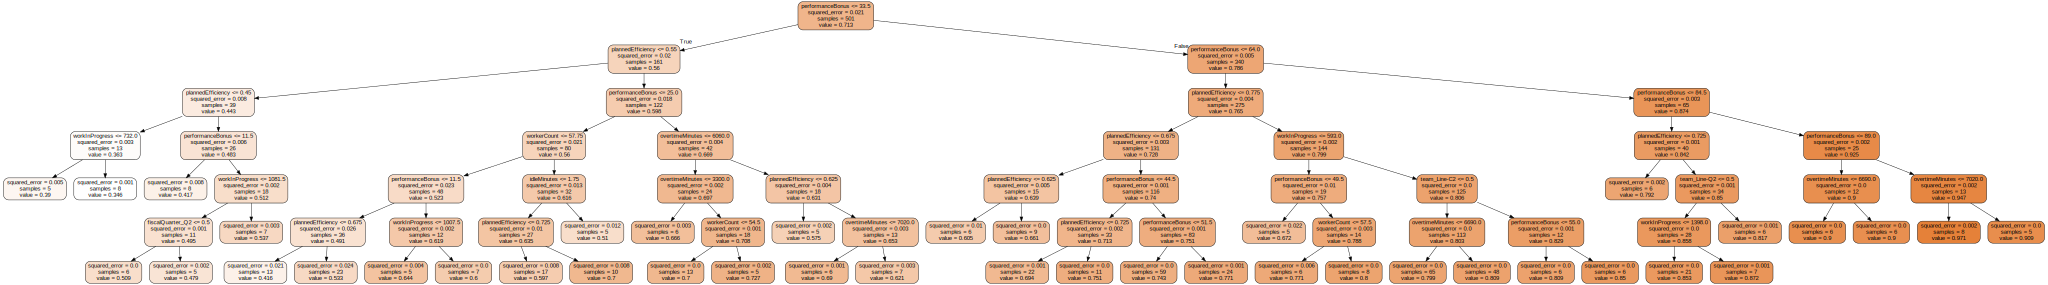

In [ ]:
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph               # decision tree visualization

- From the model trainning its evident that the the tree is underfitting as there is less dataset and is not able to lean more patterns as there are no more patterns to learn.
- I tried usinng tunning the model with diffrent depths which showed no signifficant change hence we can conclude that its underfitting.

## Model Training: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/stitching_unit_clean.csv')

In [ ]:
X = df.drop(columns=['efficiencyScore'])
y = df['efficiencyScore']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=8,
    random_state=42
)
rf_model.fit(X_train, y_train)          # train model

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)         # get predictions

In [ ]:
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))           # evaluate the model

R² Score: 0.8562554851643251
MSE: 0.002346439706603674


In [ ]:
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n Important Features:\n", rf_importance)     # important features


 Important Features:
                                   Feature  Importance
4                        performanceBonus    0.676719
0                       plannedEfficiency    0.157218
2                          workInProgress    0.039566
3                         overtimeMinutes    0.029700
1                     standardMinuteValue    0.024140
5                             idleMinutes    0.020485
6                             workerCount    0.017404
21                       fiscalQuarter_Q3    0.004269
7                            team_Line-C2    0.003239
16                           team_Line-S2    0.002957
22                       fiscalQuarter_Q4    0.002851
11                           team_Line-P1    0.002566
23                       fiscalQuarter_Q5    0.002541
18  styleChangeCount_Minor Style Revision    0.002517
20                       fiscalQuarter_Q2    0.002470
17                           team_Line-S3    0.002285
14                           team_Line-Q2    0.002225
15   

- Random forest was initially overfitting and then I reduced the depth to 8 where the model was pretty stable.
- Has the data is little the model is memorizing all the patterns which is a this may result in overfitting.

## Finishing and Quality

In [62]:
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go

In [65]:
df = pd.read_csv('/content/finishing_quality.csv')

In [66]:
df = df.drop('workInProgress', axis=1)

- As the Worker count is 28 max, we can say that a person can handdle maximum of 2 unit per instance.
- So we are filling the value between the range of 0 to 56.
- If we take workerCount into the calculation then WIP and workerCount would have high correlation.

In [67]:
bonus_1x = ['Line-C2', 'Line-S2', 'Line-S1', 'Line-F1', 'Line-P2', 'Line-S3']
bonus_2x = ['Line-Q1', 'Line-F2']

In [68]:
def calculate_performance_bonus(row):
    base_bonus = 0
    if any(team in row['team'] for team in bonus_1x):
        base_bonus = row['workerCount'] * 120
    elif any(team in row['team'] for team in bonus_2x):
        base_bonus = row['workerCount'] * 120 * 2

    return base_bonus + (row['efficiencyScore'] * 5)

- From the dataset we can see that there is a relation with Teams, Performance Bonus and Worker Count.
- (Line-C2', 'Line-S2', Line-C2', 'Line-S2', 'Line-S1', 'Line-F1', 'Line-P2', 'Line-S3') these teams get 1x bonus.
- ('Line-F2', 'Line-Q1') these teams get 2x bonus.
- To introduce a relation with Efficiency Score we here are addind a small value taking the values of Target varriable.

In [69]:
df['performanceBonus'] = df.apply(calculate_performance_bonus, axis=1)

In [70]:
df = df.drop(['recordDate', 'productionDept', 'styleChangeCount'], axis=1)

In [71]:
categorical_features = ['fiscalQuarter', 'dayOfWeek', 'team']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

/tmp/ipython-input-3994455089.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [72]:
df.head()

,plannedEfficiency,standardMinuteValue,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore,fiscalQuarter_Q2,fiscalQuarter_Q3,...,team_Line-F1,team_Line-F2,team_Line-F3,team_Line-P1,team_Line-P2,team_Line-Q1,team_Line-Q2,team_Line-S1,team_Line-S2,team_Line-S3
0,0.8,2.90,1440,963.405303,0.0,0,8.0,0.681061,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.7,3.90,960,961.625000,0.0,0,8.0,0.325000,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.8,2.90,960,3.338021,0.0,0,8.0,0.667604,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.5,3.94,3360,963.844236,0.0,0,8.0,0.768847,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.5,3.94,3360,963.844236,0.0,0,8.0,0.768847,0,0,...,0,0,0,0,0,0,0,1,0,0


- Here we have dropped columns which do not provide any actual insights.
- Also we are encoding the resulted categorical values.
- Hence making the data ready for model training.

## Finishing and Quality Model Training: Decision Tree

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score, mean_squared_error
import graphviz

In [74]:
X = df.drop(columns=['efficiencyScore'])
y = df['efficiencyScore']        #drop target

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)       # train model

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [77]:
y_pred_dt = dt_model.predict(X_test)

In [78]:
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))        #error

R² Score: 0.7843686320287684
MSE: 0.0077163856413845775


In [79]:
dt_coef_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
dt_coef_df = dt_coef_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", dt_coef_df)          # important features


Feature Importance:
                 Feature  Importance
3      performanceBonus    0.874866
6           workerCount    0.109653
0     plannedEfficiency    0.006678
21         team_Line-P2    0.006482
1   standardMinuteValue    0.002321
4           idleMinutes    0.000000
2       overtimeMinutes    0.000000
7      fiscalQuarter_Q2    0.000000
8      fiscalQuarter_Q3    0.000000
9      fiscalQuarter_Q4    0.000000
5           idleWorkers    0.000000
10     fiscalQuarter_Q5    0.000000
11   dayOfWeek_Saturday    0.000000
13   dayOfWeek_Thursday    0.000000
12     dayOfWeek_Sunday    0.000000
15  dayOfWeek_Wednesday    0.000000
16         team_Line-C2    0.000000
17         team_Line-F1    0.000000
14    dayOfWeek_Tuesday    0.000000
18         team_Line-F2    0.000000
19         team_Line-F3    0.000000
20         team_Line-P1    0.000000
22         team_Line-Q1    0.000000
23         team_Line-Q2    0.000000
24         team_Line-S1    0.000000
25         team_Line-S2    0.000000
26    

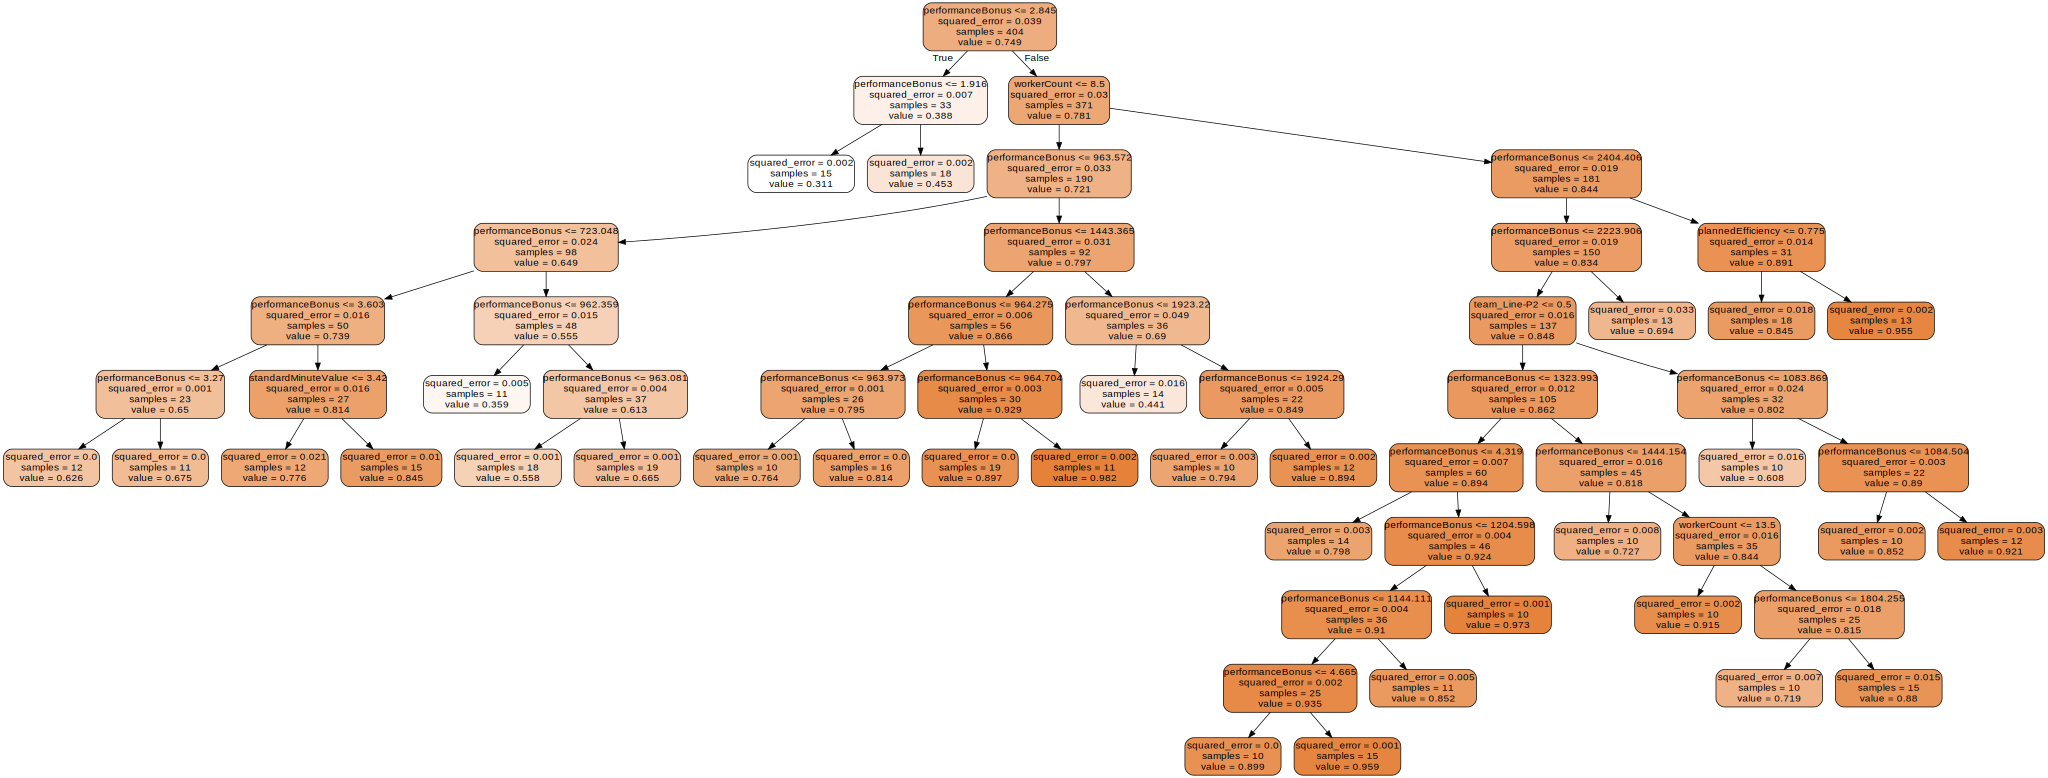

In [80]:
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph               # decision tree visualization

- From the model trainning its evident that the the tree is only able to find a pattern to a certain limit as there is less dataset and is not able to lean more patterns.
- I tried usinng tunning the model with diffrent depths which showed no signifficant change hence we can conclude that its stable as of now.

## Finishing and Quality Model Training: Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
X = df.drop(columns=['efficiencyScore'])
y = df['efficiencyScore']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=15,
    random_state=42
)
rf_model.fit(X_train, y_train)          # train model

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=42)

In [85]:
y_pred_rf = rf_model.predict(X_test)         # get predictions

In [86]:
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))           # evaluate the model

R² Score: 0.8067303470812766
MSE: 0.0069161698909056


In [87]:
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n Important Features:\n", rf_importance)     # important features


 Important Features:
                 Feature  Importance
3      performanceBonus    0.750320
6           workerCount    0.105344
2       overtimeMinutes    0.028830
1   standardMinuteValue    0.021098
9      fiscalQuarter_Q4    0.012996
0     plannedEfficiency    0.009829
16         team_Line-C2    0.007252
12     dayOfWeek_Sunday    0.007095
13   dayOfWeek_Thursday    0.006945
21         team_Line-P2    0.005952
8      fiscalQuarter_Q3    0.005327
22         team_Line-Q1    0.005158
10     fiscalQuarter_Q5    0.005091
15  dayOfWeek_Wednesday    0.005071
7      fiscalQuarter_Q2    0.004859
11   dayOfWeek_Saturday    0.003137
17         team_Line-F1    0.002734
18         team_Line-F2    0.002734
24         team_Line-S1    0.002644
25         team_Line-S2    0.002365
26         team_Line-S3    0.002321
14    dayOfWeek_Tuesday    0.002093
19         team_Line-F3    0.000304
23         team_Line-Q2    0.000257
20         team_Line-P1    0.000246
4           idleMinutes    0.000000
5    

- Random forest was initially similar to DT and then I reduced the depth to 15 where the model was pretty stable.
- Has the data is little the model is memorizing all the patterns which is a this may result in overfitting.